# FIO plots

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def bw_ios3(filename, fiorw, option):
    '''
    Function to read BW or IOPS from a json file
    
    Input:
        filaname :: json name file (include the path)
        fio      :: read, write, etc.
        option   :: iops, bw_bytes, runtime, etc. 
    NOTE: All the inputs are str type.
    '''
    with open(filename) as f:
        data = json.load(f)
    return data['jobs'][0][fiorw][option]

In [3]:
def plot_bw_iops(HOME, nodes, fiojobs):
    '''
    Function to plot total BW & IOPS using HOME files for n nodes and n fio_jobs
    '''
    #Plot environment
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 16))

    for fjob in fiojobs:
        total_flow = []
        total_fio_bw = []
        total_fio_iops = []
        
        for node in nodes:
            path=HOME+str(node)+'_node/'
            content=os.listdir(path)
            fiojob = [s for s in content if "fiojob_"+str(fjob) in s]
            
            if len(fiojob)>1:
                if len(fiojob[0])<len(fiojob[1]): fiojob=fiojob[0]
                else: fiojob = fiojob[1]
            else:
                fiojob= fiojob[0]
            
            fio_bw = 0
            fio_iops = 0
            for folder in os.listdir(path+fiojob):

                fio_bw+= bw_ios3(path+fiojob+"/"+folder+"/output.json","read", 'bw_bytes')*1e-6 #in Mb/s
                fio_iops+= bw_ios3(path+fiojob+"/"+folder+"/output.json", "read", 'iops')*1e-3      #in k
                
            total_fio_bw.append(fio_bw)
            total_fio_iops.append(fio_iops)
            
        #plt.plot(nodes,total_flow, '--',label='fio_tjob='+str(fjob))
        ax[0].plot(nodes,total_fio_bw,'o--',label='fio_job='+str(fjob))
        ax[1].plot(nodes,total_fio_iops,'o--',label='fio_job='+str(fjob))                 
        
    ax[0].legend()
    ax[0].set_xticks(nodes)
    ax[0].set_xlabel('nodes', size=16)
    ax[0].set_ylabel('MB/s', size=16)
    ax[0].set_title("Total Bandwidth vs. n nodes", size=20)

    ax[1].legend()
    ax[1].set_xticks(nodes)
    ax[1].set_xlabel('nodes')
    ax[1].set_ylabel('kIOPS')
    ax[1].set_title("Total IOPS vs. n nodes")
    plt.show()

# Seqread plots

# IODEPTH = 32, DIRECT = 1

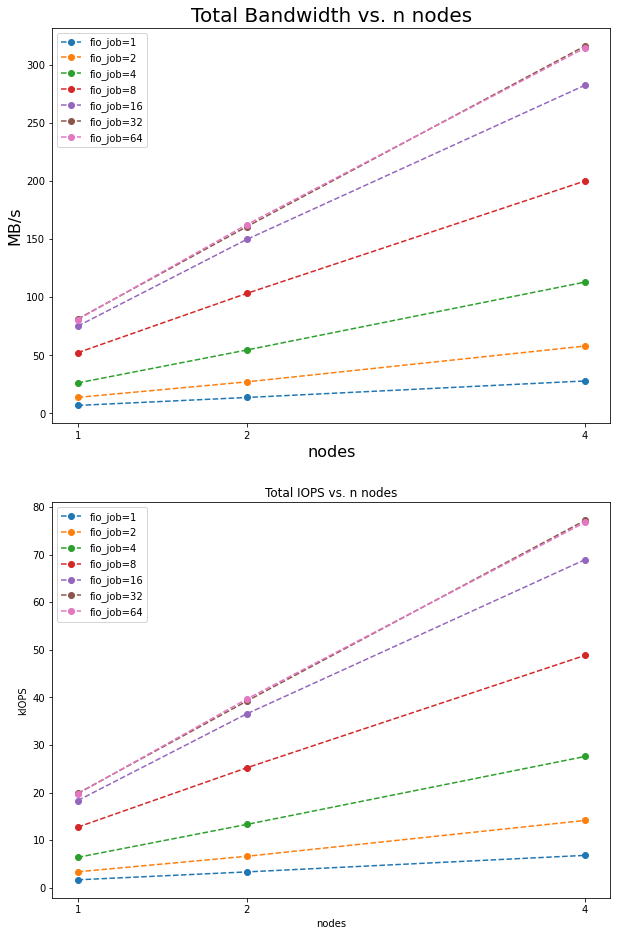

In [5]:
# SEQ_READ#
HOME_seqread = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/seqread/IODEPTH_32_DIRECT_1/"
nodes = [1, 2, 4]
fiojobs = [1,2, 4, 8,16, 32, 64]
plot_bw_iops(HOME_seqread, nodes, fiojobs)

# IODEPTH = 256, DIRECT = 1

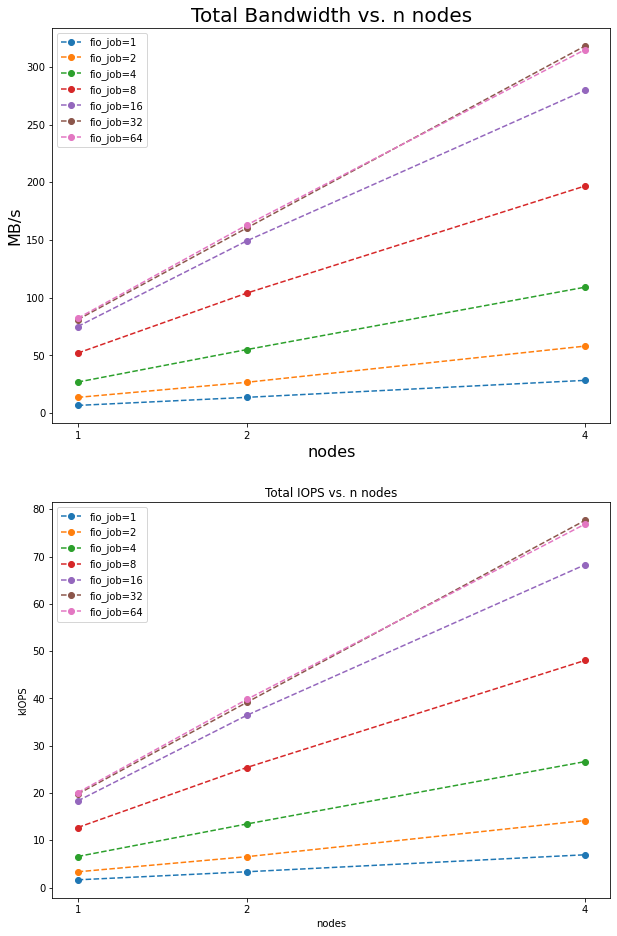

In [14]:
# SEQ_READ
HOME_seqread = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/seqread/IODEPTH_256_DIRECT_1/"
nodes = [1, 2, 4]
fiojobs = [1,2, 4, 8,16, 32, 64]
plot_bw_iops(HOME_seqread, nodes, fiojobs)

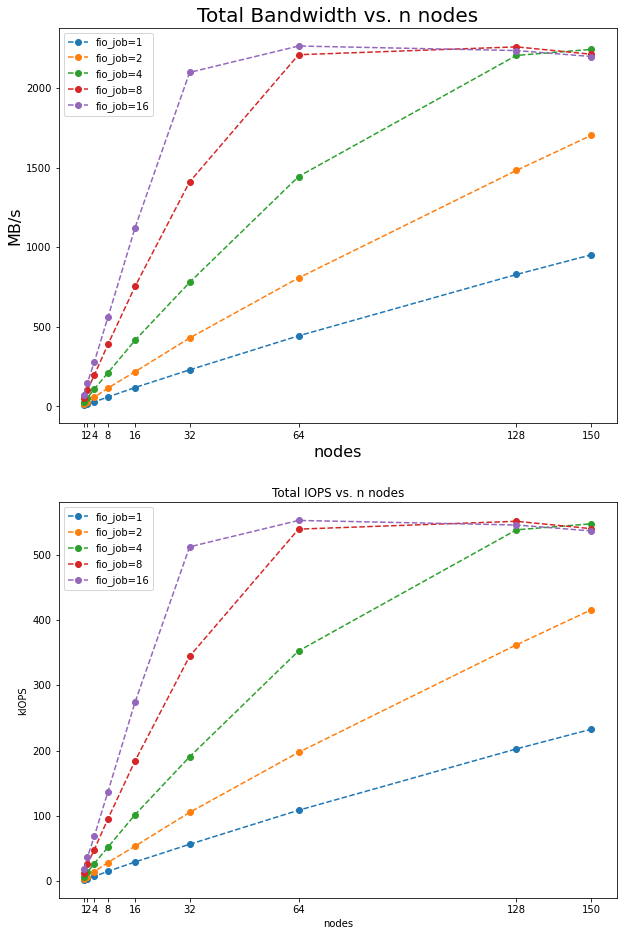

In [15]:
# SEQ_READ
HOME_seqread = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/seqread/IODEPTH_256_DIRECT_1/"
nodes = [1, 2, 4, 8,16, 32, 64, 128, 150]
fiojobs = [1,2, 4, 8,16]
plot_bw_iops(HOME_seqread, nodes, fiojobs)

# IODEPTH = 256, DIRECT = 0

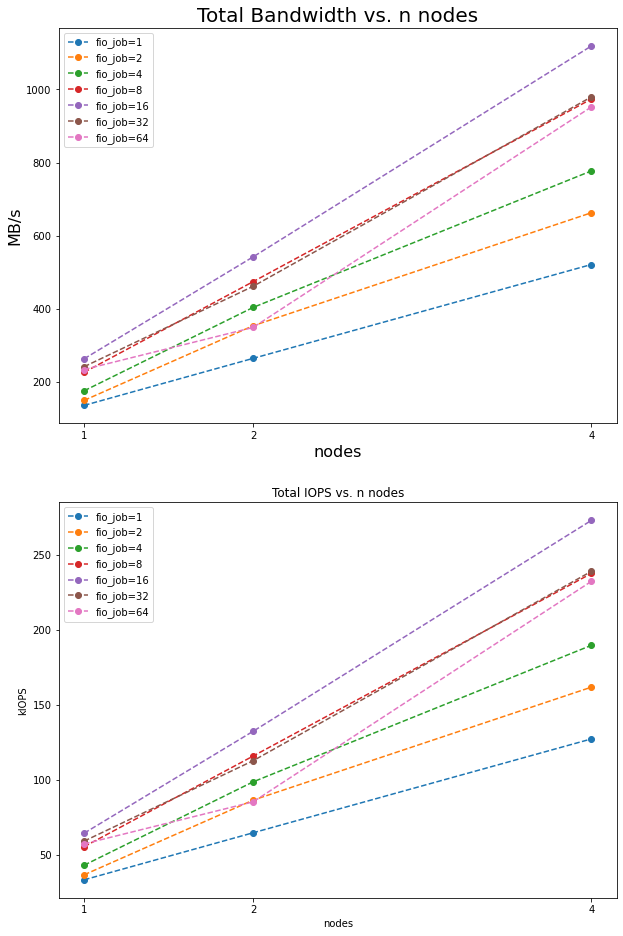

In [8]:
# SEQ_READ
HOME_seqread = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/seqread/"
nodes = [1, 2, 4]
fiojobs = [1,2, 4, 8,16, 32, 64]
plot_bw_iops(HOME_seqread, nodes, fiojobs)